In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 

In [2]:
df = pd.read_csv('/Users/mehakklunkar/Downloads/ML Study Material/hospital_readmissions.csv')
print(df.head())


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

In [3]:
df.shape

(25000, 17)

In [4]:
print(df.describe())

       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000

In [5]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [7]:
n = len(df)
gender_array = np.array(['Male'] * (n // 2) + ['Female'] * (n // 2))

if n % 2 != 0:
    gender_array = np.append(gender_array, 'Male')

np.random.shuffle(gender_array)

gender_df = pd.DataFrame(gender_array, columns=['Gender'])
df = pd.concat([df, gender_df], axis=1)

In [8]:
df = pd.get_dummies(df, columns=['diag_1', 'diag_2', 'diag_3'], drop_first=True)

df['diabetes_med'] = df['diabetes_med'].map({'no': 0, 'yes': 1})
df['readmitted'] = df['readmitted'].map({'no': 0, 'yes': 1})
df['change'] = df['change'].map({'no': 0, 'yes': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

df = df.drop(columns=['medical_specialty', 'A1Ctest', 'glucose_test'])

print(df.head())

/var/folders/mc/vj385n_x69j69tt44nwxffdc0000gn/T/ipykernel_48575/3235148871.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency  change  diabetes_med  ...  \
0             2            0            0       0             1  ...   
1             0            0            0       0             1  ...   
2             0            0            0       1             1  ...   
3             1            0            0       1             1  ...   
4             0            0            0       0             1  ...   

   diag_2_Musculoskeletal  diag_2_Other  diag_2_Respiratory  diag_3_Diabetes  \
0           

In [9]:
df = pd.DataFrame(df)

age_mapping = {
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)

y = df['readmitted']
X = df.drop('readmitted', axis=1)

print("Modified DataFrame:\n", df)
print("\nFeature matrix X:\n", X)

Modified DataFrame:
        age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0       75                 8                72             1             18   
1       75                 3                34             2             13   
2       55                 5                45             0             18   
3       75                 2                36             0             12   
4       65                 1                42             0              7   
...    ...               ...               ...           ...            ...   
24995   85                14                77             1             30   
24996   85                 2                66             0             24   
24997   75                 5                12             0              6   
24998   75                 2                61             3             15   
24999   55                10                37             1             24   

       n_outpatient  n_inpatie

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression(max_iter=10, tol=1e-4) 
model.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [13]:
tri_pre=model.predict(X_train)
tri_acc=accuracy_score(tri_pre,y_train)
print('Training Accuracy is',tri_acc)

Training Accuracy is 0.61075


In [14]:
tes_pre=model.predict(X_test)
tes_acc=accuracy_score(tes_pre,y_test)
print('Testing Accuracy is',tes_acc)

Testing Accuracy is 0.6126


In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

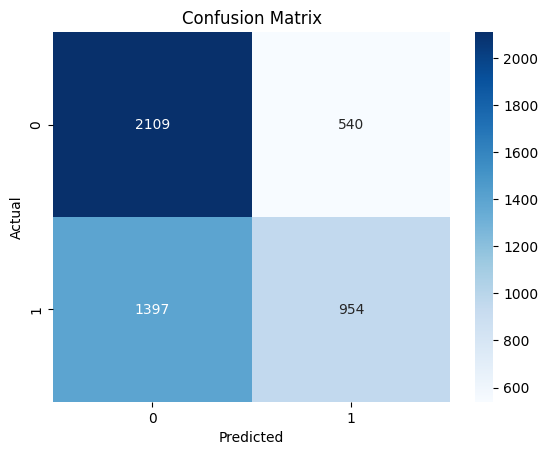

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

*Inference*:<br>
*The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives. A higher count of true positives and true negatives indicates good model performance.*

In [17]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Precision: 0.6386
Recall: 0.4058


*Inference:*<br>
*-The precision of the model indicates how many of the predicted admissions were actual admissions, while recall tells us how well the model identifies actual admissions.*<br>
*-The precision is 63.68% and recall is 40.4%.*

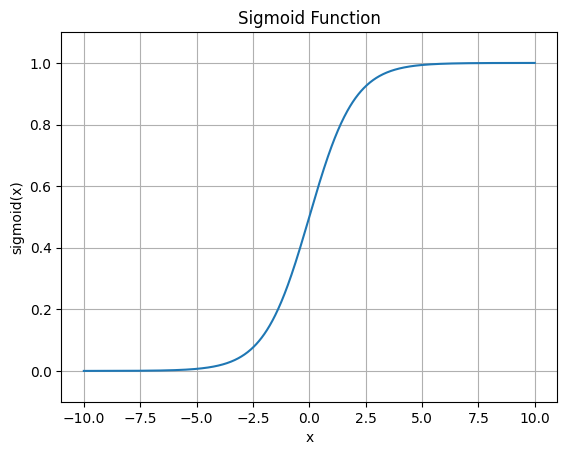

In [18]:
def sigmoid(y_pred):
  return 1 / (1 + np.exp(-X_test))

X_test = np.linspace(-10, 10, 1000) 
y = sigmoid(X_test)
plt.plot(X_test, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
plt.xlim([-11, 11])
plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.show()

*Inference:*<br>
*The sigmoid function plot shows how logistic regression maps the input features to a probability between 0 and 1. This helps in understanding how the model interprets the data to make predictions.*

/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

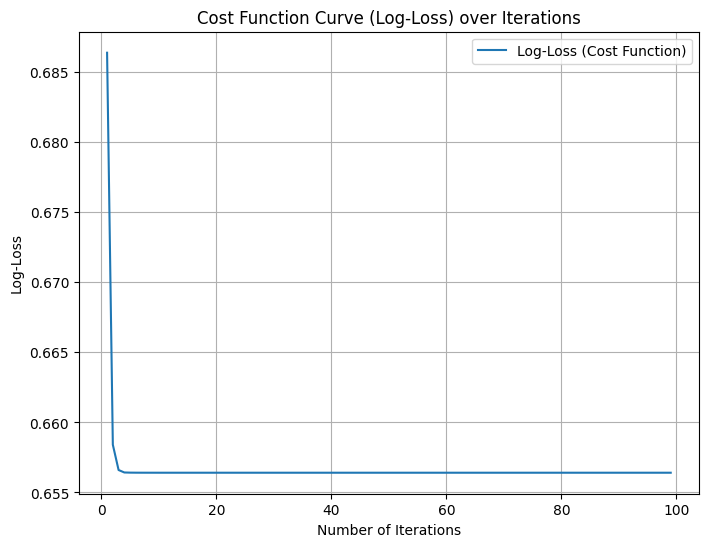

In [19]:
log_losses = []

for i in range(1, 100): 
    model.max_iter = i
    model.fit(X_train, y_train)
    
    y_pred_probs = model.predict_proba(X_train)

    loss = log_loss(y_train, y_pred_probs)
    log_losses.append(loss)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 100), log_losses, label='Log-Loss (Cost Function)')
plt.xlabel('Number of Iterations')
plt.ylabel('Log-Loss')
plt.title('Cost Function Curve (Log-Loss) over Iterations')
plt.legend()
plt.grid(True)
plt.show()

*Inference:*<br>
*The cost function graph shows how the model's prediction error decreases over iterations during training. A decreasing trend indicates successful learning.*

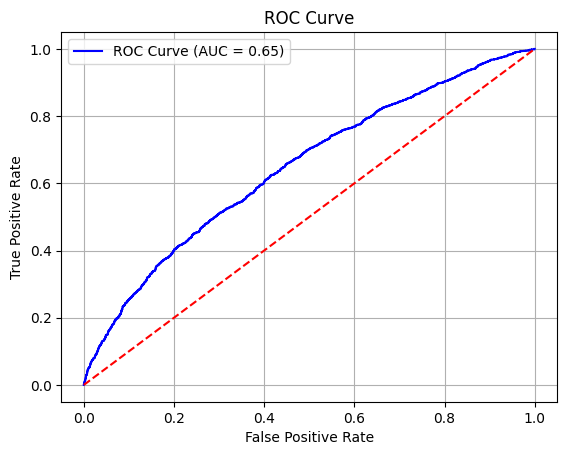

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

*Inference:*<br>
*The ROC curve illustrates the trade-off between the true positive rate and the false positive rate across different thresholds. The AUC score, close to 1, indicates excellent model performance in distinguishing between patients who need admission and those who don't.*

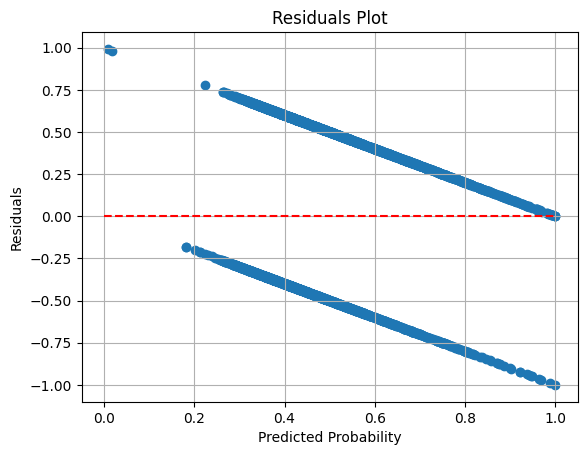

In [21]:
residuals = y_test - y_pred_proba
plt.scatter(y_pred_proba, residuals)
plt.hlines(y=0, xmin=0, xmax=1, colors='red', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

*Inference:*<br>
*The residuals plot helps in assessing how well the model fits the data. A random pattern in residuals suggests a good model fit, whereas any noticeable pattern might indicate model inadequacies.*

In [22]:
coefficients = model.coef_.flatten()
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

In [23]:
coef_df

,Feature,Coefficient
6,n_inpatient,0.449535
7,n_emergency,0.212108
5,n_outpatient,0.150649
9,diabetes_med,0.104070
0,age,0.062768
1,time_in_hospital,0.045121
11,diag_1_Diabetes,0.043878
2,n_lab_procedures,0.031739
8,change,0.018110
4,n_medications,0.009695


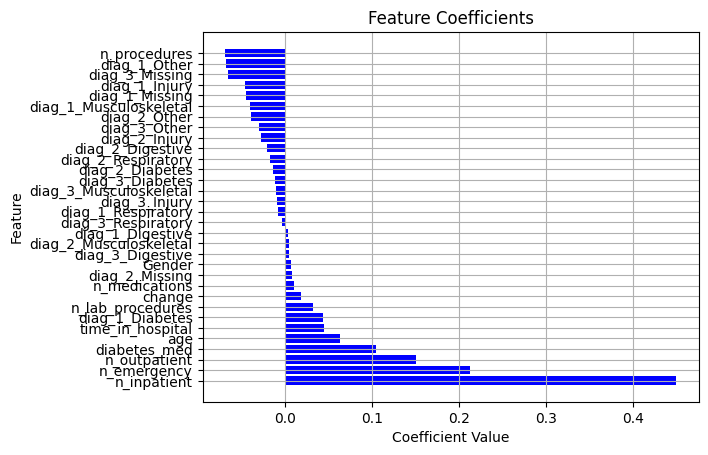

In [24]:
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

*Inference:*<br>
*The bar chart of feature coefficients visualizes the influence of each feature on the model's predictions. Positive coefficients indicate that higher values of the feature increase the likelihood of admission, while negative coefficients suggest the opposite.*

*Overall Interpretations:*<br>
*-The logistic regression model developed provides a reliable prediction of whether patients in the emergency department should be admitted or sent home.*<br>
*-The testing accuracy of the current model is 61.2% and the AUC score is 0.65.*<br>
*-The confusion matrix, precision, and recall metrics suggest that the model is effective in identifying patients who require hospital admission.*<br>
*-The high AUC score further validates the model's discriminative ability.*<br>
*-The analysis of feature coefficients shows that certain vital signs and medical history factors significantly impact the admission decision.*